<a href="https://colab.research.google.com/github/saumyasahai/Python_Data_Analytics_Course/blob/main/2_Skill_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What are the most demanded skills for the top 3 most popular data roles?

#### Methodology
1. Clean-up skill column
2. Calculate skill count based on `job_title_short`
3. Calculate skill percentage
4. Plot final findings

#### Original Exploration
[13_Matplotlib_Format_Charts.ipynb](../2_Advanced/13_Matplotlib_Format_Charts.ipynb)

## Import Libraries and Data

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

In [ ]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [ ]:
df_US = df[df['job_country'] == 'United States']

In [ ]:
df_skills = df_US.explode(['job_skills'])
df_skills[['job_title', 'job_skills']]


,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [ ]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short'])['job_skills'].count()
df_skills_count = df_skills_count.reset_index(name = 'skill_count')
df_skills_count = (
    df_skills_count
        .sort_values(by='skill_count', ascending=False).reset_index()
)

df_skills_count

,index,job_skills,job_title_short,skill_count
0,1209,python,Data Scientist,42379
1,1521,sql,Data Analyst,34452
2,1523,sql,Data Scientist,30034
3,455,excel,Data Analyst,27519
4,1243,r,Data Scientist,26022
...,...,...,...,...
1865,1785,vue.js,Business Analyst,1
1866,60,arch,Business Analyst,1
1867,71,asana,Machine Learning Engineer,1
1868,968,no-sql,Machine Learning Engineer,1


In [ ]:
df_titles = df_skills_count['job_title_short'].unique().tolist()


In [ ]:
df_titles = sorted(df_titles[:3])
df_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [ ]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name = 'jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [ ]:
df_skills_percent = pd.merge(df_skills_count, df_job_title_count, on = 'job_title_short', how = 'left')
df_skills_percent['Percent'] = (df_skills_percent['skill_count']/df_skills_percent['jobs_total'])*100
df_skills_percent

,index,job_skills,job_title_short,skill_count,jobs_total,Percent
0,1209,python,Data Scientist,42379,58830,72.036376
1,1521,sql,Data Analyst,34452,67816,50.802171
2,1523,sql,Data Scientist,30034,58830,51.052184
3,455,excel,Data Analyst,27519,67816,40.578919
4,1243,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...,...
1865,1785,vue.js,Business Analyst,1,7382,0.013546
1866,60,arch,Business Analyst,1,7382,0.013546
1867,71,asana,Machine Learning Engineer,1,921,0.108578
1868,968,no-sql,Machine Learning Engineer,1,921,0.108578


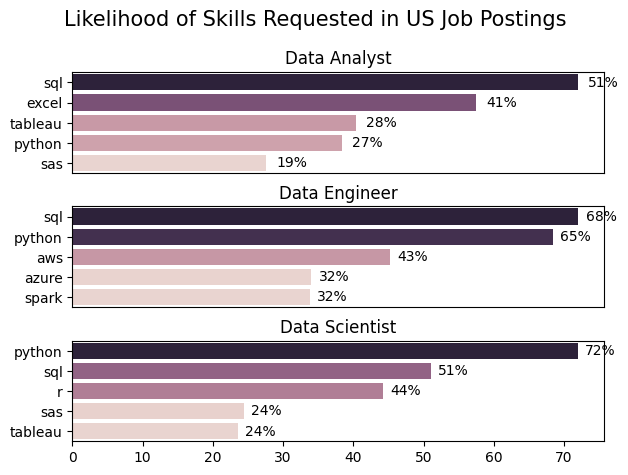

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(len(df_titles), 1)

for i, job_title in enumerate(df_titles):
  df_plot = df_skills_percent[df_skills_percent['job_title_short'] == job_title].head(5)
  sns.barplot(data = df_plot, x = 'Percent', y = 'job_skills', ax=ax[i], hue='skill_count')
  ax[i].set_title(job_title)
  ax[i].set_xlabel('')
  ax[i].set_ylabel('')
  ax[i].legend().remove()
  if i != len(df_titles) - 1:
      ax[i].set_xticks([])


  for n, v in enumerate(df_plot['Percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()